# Описание задачи
Датасет содержит релеавнтную информацию о пациетнах, на основании которой предполагается предсказать возможность возникновения инсульта.

## Описание признаков
1. id
2. Пол: "Мужчина", "Женщина" или "Другое"
3. Возраст
4. Гипертензия: 0, если у пациента нет гипертензии, 1 - иначе
5. Болезни сердца: 0, если не было, 1 - иначе
6. Когда либо был_а женат/замужем: "Нет" или "Да"
7. Вид деятельности: "ребёнок", "работает легально", "никогда не работал", "неофициально" или "самозанятый"
8. Где проживает: "сельская местность" или "город"
9. Средний баланс глюкозы в крови
10. Индекс массы тела
11. Зависимость от курения: "раньше курил", "никогда не курил", "курит" or "неизвестно"*
12. Приступ: 1, если приступ был, 0 - иначе
*"неизвестно" в зависимости от курения означает, что данная информация недоступна для конкретного пациента

Ссылка на датасет: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [1]:
import os
import numpy as np
import pandas
import matplotlib.pyplot
import seaborn

# Загрузка датасета

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), '.', 'healthcare-dataset-stroke-data.csv'))

In [3]:
dataset = pandas.read_csv(path)
dataset.columns = dataset.columns.str.strip()

Число объектов, признаков

In [4]:
dataset.shape

(5110, 12)

# Подготовка датасета

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Удаление ненужных значений
Уберём столбец **id**

In [6]:
dataset.drop('id', axis=1, inplace=True)

## Обработка пропущенных значений

In [7]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Столбцы **bmi** и **smoking_status** содержат в себе пропущенные значения. Хотя в **smoking_status**, судя по предыдущей клетки, пропущенных значений нет, но статус Unknown будем считать пропущенным значением.

In [8]:
sum(dataset['smoking_status'] == 'Unknown')

1544

Заменим 'N/A' и 'Unknown' на явное отсутсвие значения

In [9]:
dataset['bmi'].replace({'N/A': None}, inplace=True)
dataset['smoking_status'].replace({'Unknown': None}, inplace=True)

**bmi** является числовым признаком, поэтому пропущенные значения заменим медианной величиной

In [10]:
dataset['bmi'].fillna(dataset['bmi'].median(), inplace=True)

**smoking_status** является категориальным признаком с большим числом пропусков, поэтому пропущенные значения будем заполнять не модой, а сохраняя распределение среди известных записей

In [11]:
probabilities = dataset['smoking_status'].value_counts(normalize=True)
missing = dataset['smoking_status'].isnull()
dataset.loc[missing, 'smoking_status'] = np.random.choice(probabilities.index, size=len(dataset[missing]), p=probabilities.values)

## Обработка бинарных признаков
Изменим признаки **gender**, **ever_married**, **Residence_type**, пускай теперь они принимают значения 0 или 1, где 0 это **Male**, **No**, **Rural**, а 1 это **Female**, **Yes**, **Urban** соответсвенно.

In [12]:
dataset['gender'] = np.where(dataset['gender'] == 'Female', 1, 0)
dataset['ever_married'] = np.where(dataset['ever_married'] == 'Yes', 1, 0)
dataset['Residence_type'] = np.where(dataset['Residence_type'] == 'Urban', 1, 0)

## Обработка категориальных признаков
Бинаризуем категориальный признаки **work_type**, **smoking_status**

In [13]:
dataset = pandas.get_dummies(dataset)

In [14]:
dataset

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,1,0
2,0,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,1
4,1,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.1,0,0,0,1,0,0,0,1,0
5106,1,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,1,0
5107,1,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,1,0
5108,0,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,1,0,0


# Визуализация
Выведем основные метрики

In [15]:
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.585910,43.226614,0.097456,0.054012,0.656164,0.508023,106.147677,28.862035,0.048728,0.128571,0.004305,0.572407,0.160274,0.134442,0.249511,0.531898,0.218591
std,0.492612,22.612647,0.296607,0.226063,0.475034,0.499985,45.283560,7.699562,0.215320,0.334758,0.065480,0.494778,0.366896,0.341160,0.432772,0.499030,0.413331
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.885000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Анализ выбросов

Выбросы обработаем, используя межквартильный диапазон.

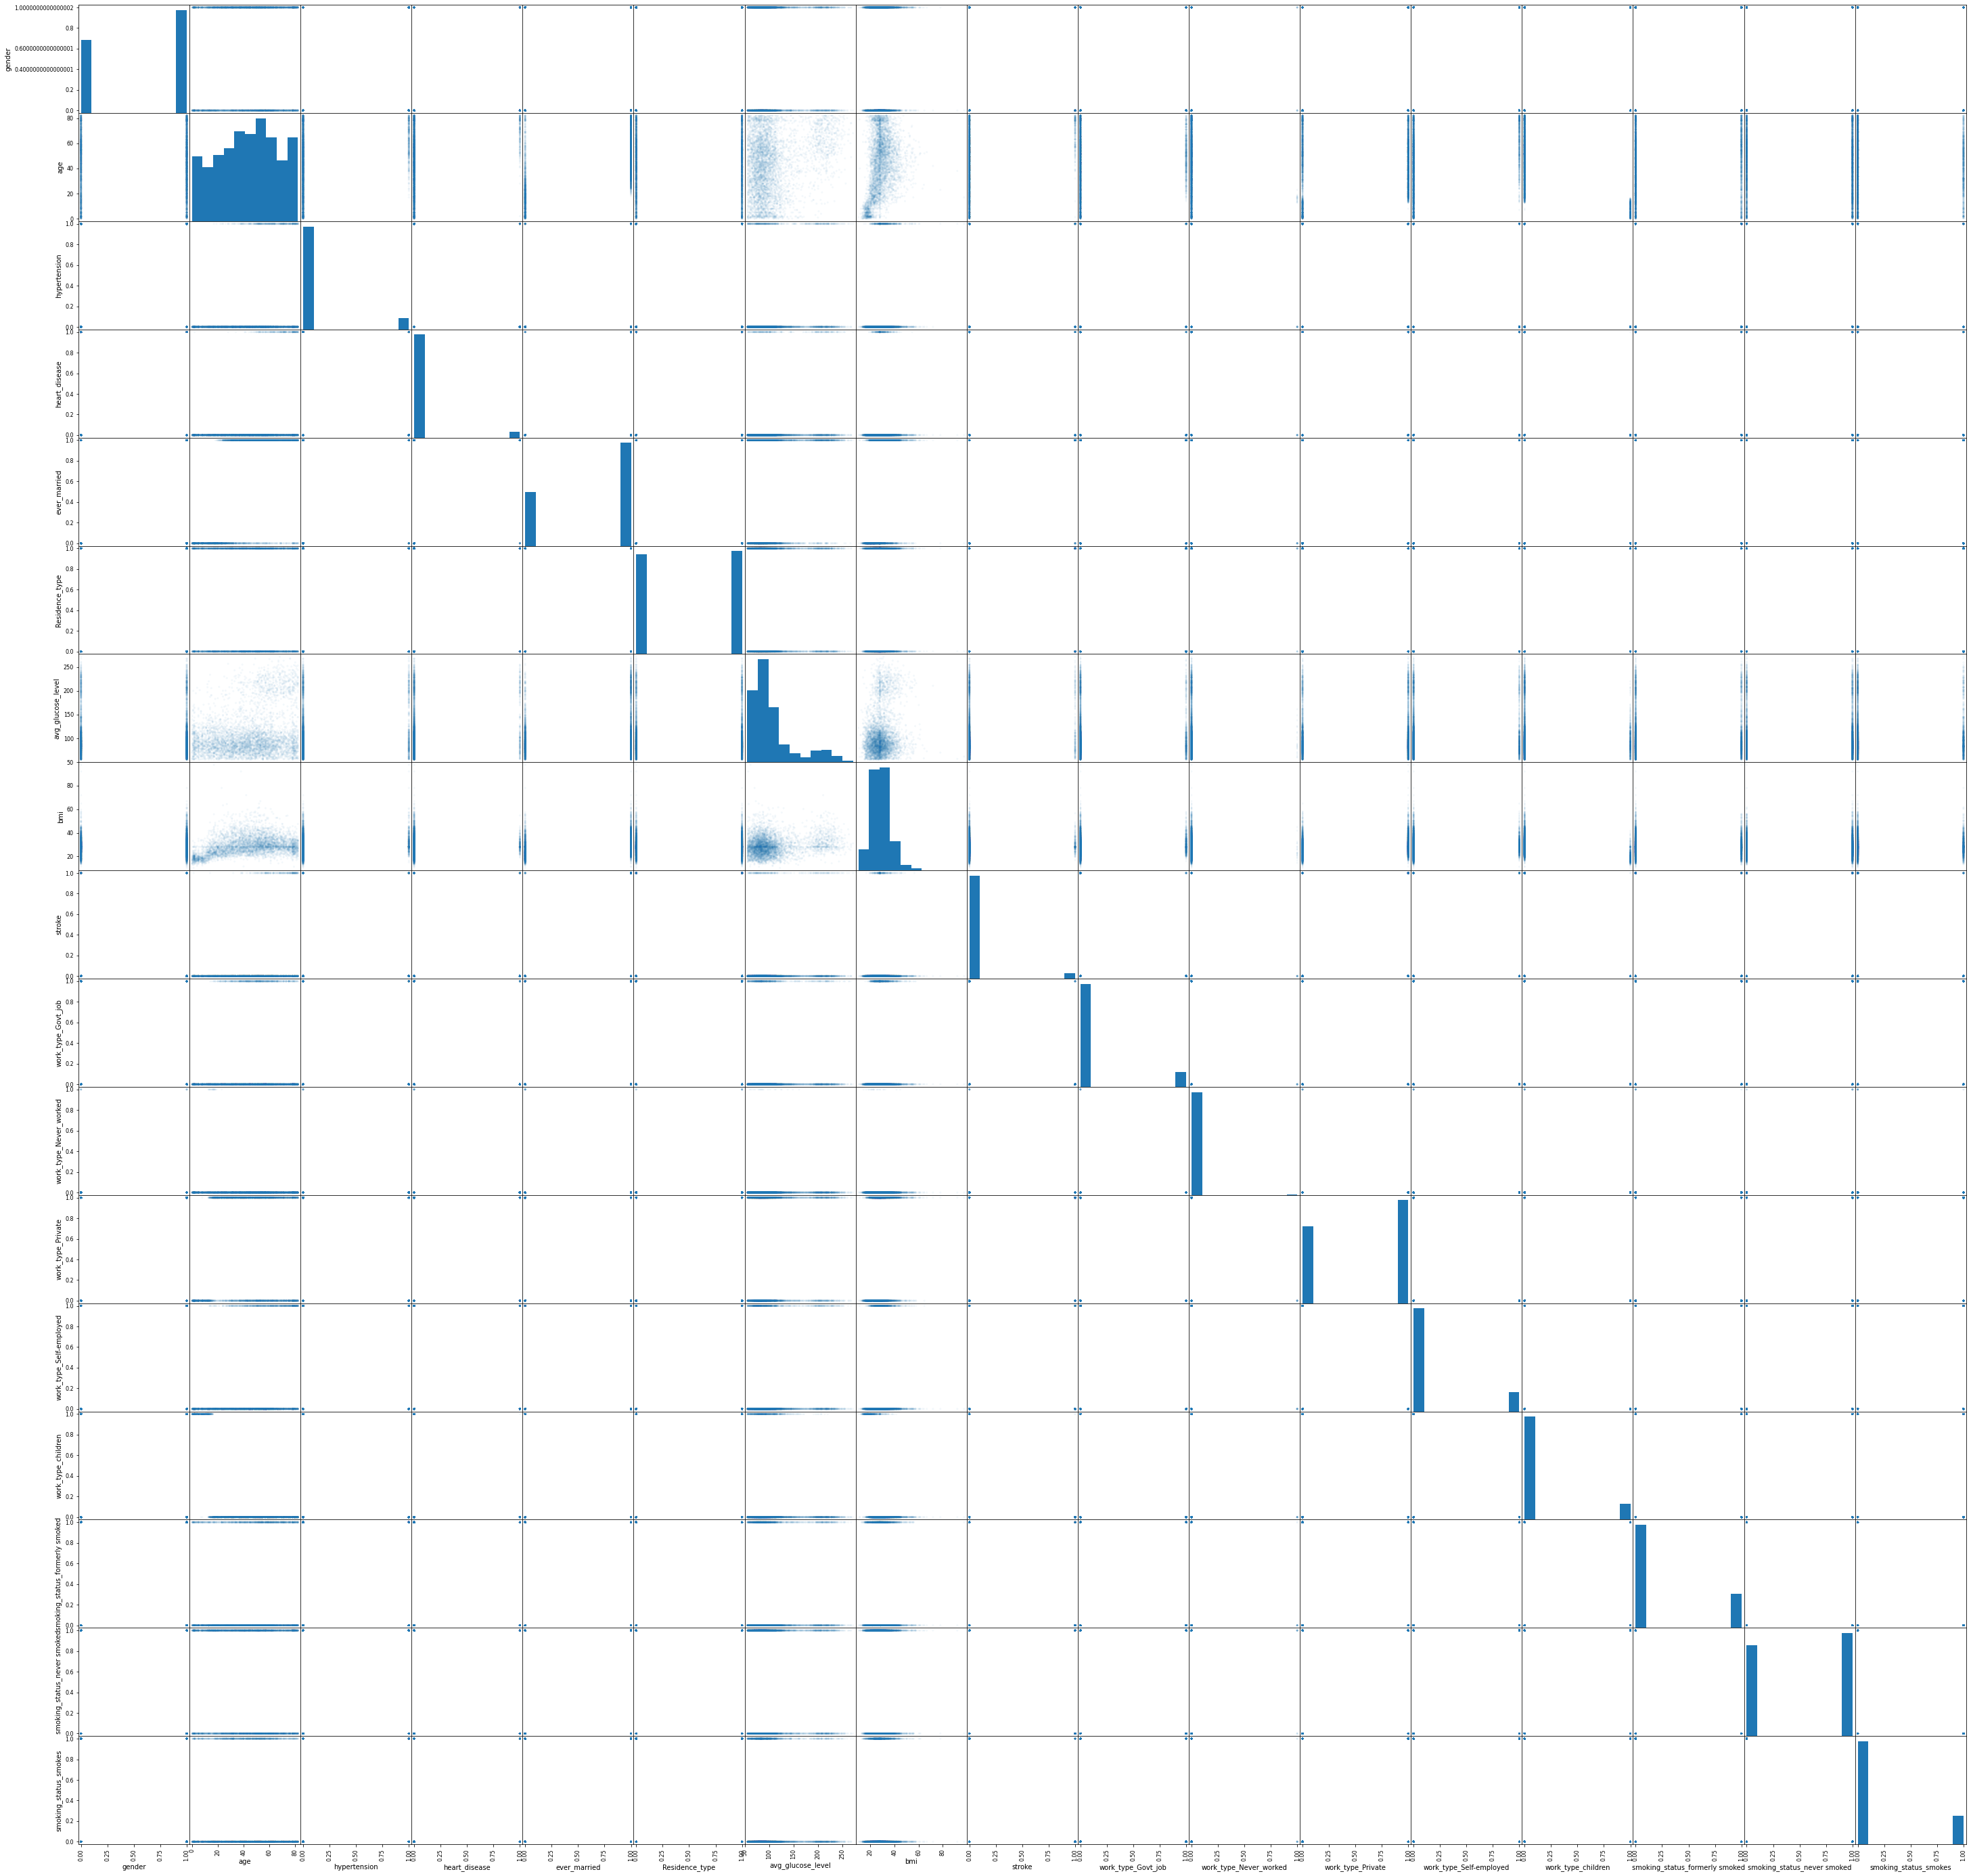

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha = 0.05, figsize = (10, 10))
pass

In [17]:
rows_to_drop = dataset[
    (dataset['age'] < dataset['age'].quantile(0.25) - 1.5 * (dataset['age'].quantile(0.75) - dataset['age'].quantile(0.25))) 
    | (dataset['age'] > dataset['age'].quantile(0.75) + 1.5 * (dataset['age'].quantile(0.75) - dataset['age'].quantile(0.25)))].index

dataset = dataset.drop(rows_to_drop)

rows_to_drop = dataset[
    (dataset['hypertension'] < dataset['hypertension'].quantile(0.25) - 1.5 * (dataset['hypertension'].quantile(0.75) - dataset['hypertension'].quantile(0.25))) 
    | (dataset['hypertension'] > dataset['hypertension'].quantile(0.75) + 1.5 * (dataset['hypertension'].quantile(0.75) - dataset['hypertension'].quantile(0.25)))].index

dataset = dataset.drop(rows_to_drop)

rows_to_drop = dataset[
    (dataset['avg_glucose_level'] < dataset['avg_glucose_level'].quantile(0.25) - 1.5 * (dataset['avg_glucose_level'].quantile(0.75) - dataset['avg_glucose_level'].quantile(0.25))) 
    | (dataset['avg_glucose_level'] > dataset['avg_glucose_level'].quantile(0.75) + 1.5 * (dataset['avg_glucose_level'].quantile(0.75) - dataset['avg_glucose_level'].quantile(0.25)))].index

dataset = dataset.drop(rows_to_drop)

rows_to_drop = dataset[
    (dataset['bmi'] < dataset['bmi'].quantile(0.25) - 1.5 * (dataset['bmi'].quantile(0.75) - dataset['bmi'].quantile(0.25))) 
    | (dataset['bmi'] > dataset['bmi'].quantile(0.75) + 1.5 * (dataset['bmi'].quantile(0.75) - dataset['bmi'].quantile(0.25)))].index

dataset = dataset.drop(rows_to_drop)
dataset.drop('hypertension', axis=1, inplace=True)

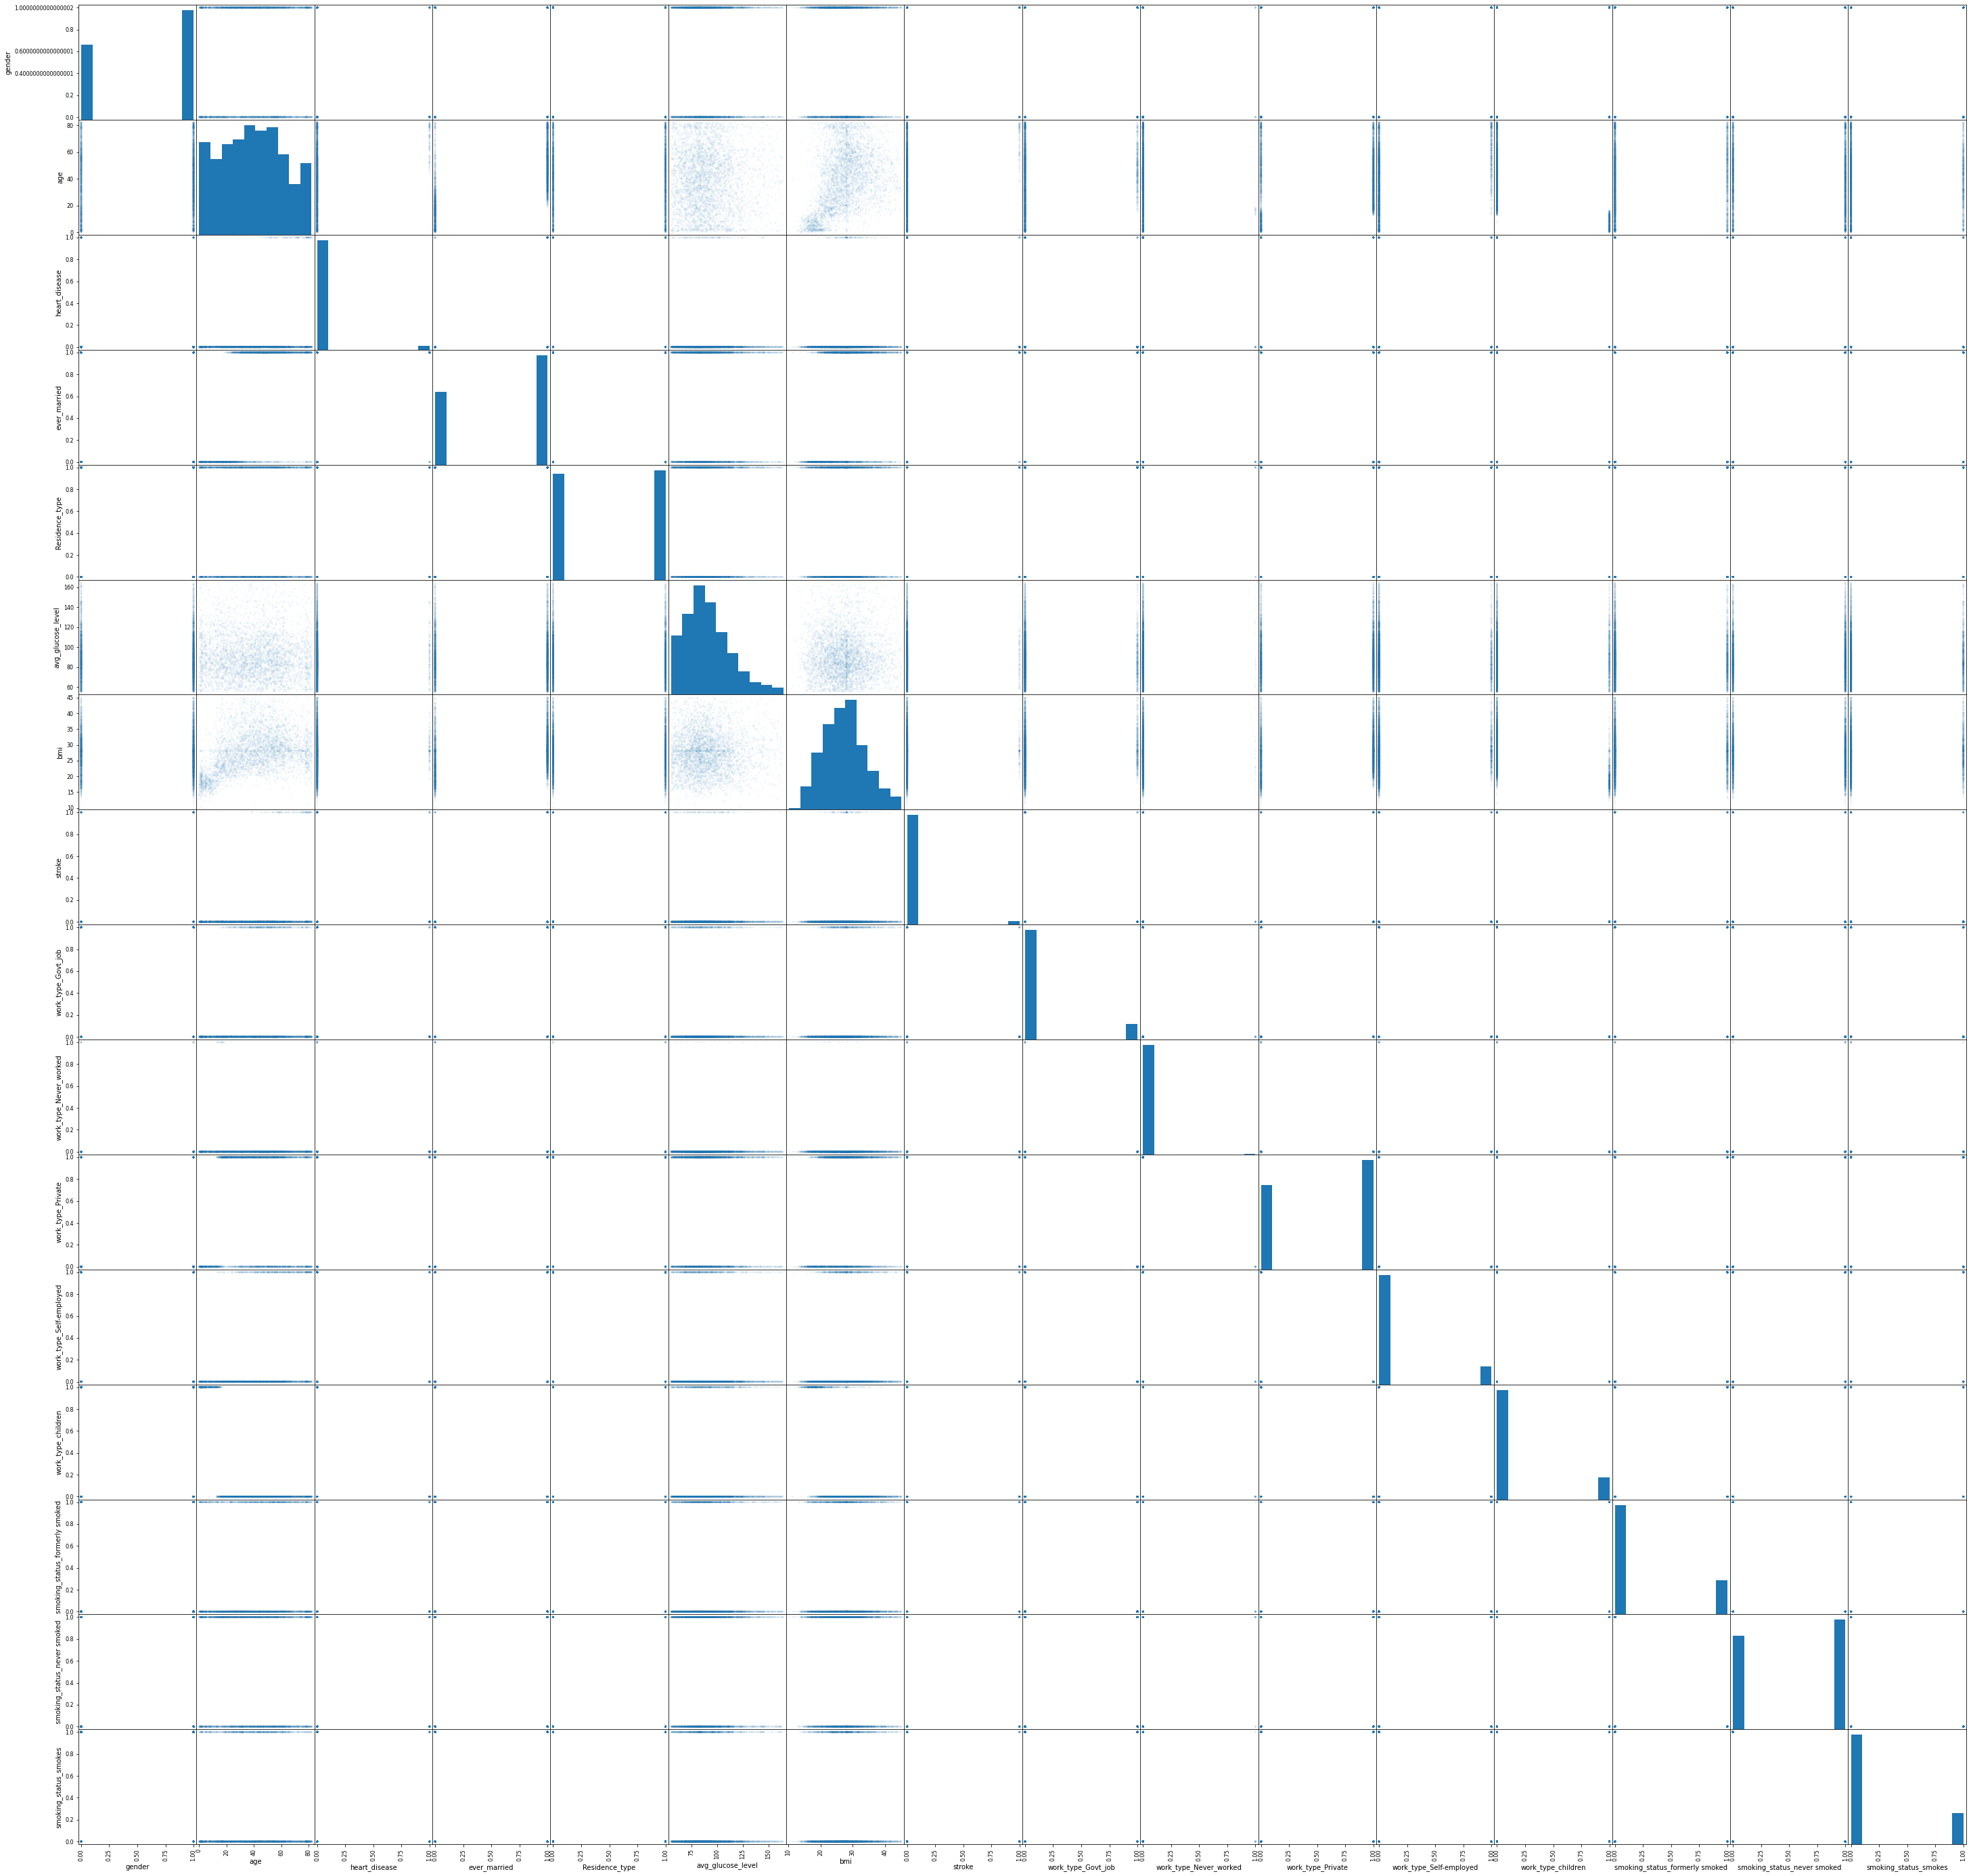

In [18]:
scatter_matrix(dataset, alpha = 0.05, figsize = (10, 10))
pass

# Мультиколлинеарность

Выведем матрицу корреляции, чтобы выявить зависимость признаков между собой.

In [20]:
correlation_matrix = dataset.corr()
correlation_matrix

,gender,age,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,0.051272,-0.086736,0.053045,0.009427,-0.031320,0.004109,-0.006046,0.028000,-0.013952,0.030505,0.048748,-0.107968,-0.020641,0.059339,-0.050047
age,0.051272,1.000000,0.234228,0.697460,0.015600,-0.029226,0.393035,0.215323,0.157564,-0.076595,0.162475,0.333075,-0.650462,0.098752,-0.086973,0.002941
heart_disease,-0.086736,0.234228,1.000000,0.112054,-0.009973,0.005162,0.046965,0.091738,0.007524,-0.013975,-0.017575,0.107666,-0.080795,0.021484,-0.049076,0.036855
ever_married,0.053045,0.697460,0.112054,1.000000,0.008143,-0.009673,0.373773,0.098738,0.154985,-0.090939,0.185354,0.197476,-0.549479,0.075786,-0.092094,0.032699
Residence_type,0.009427,0.015600,-0.009973,0.008143,1.000000,-0.024310,0.010469,0.012720,0.012491,0.025671,-0.026154,0.021738,-0.001551,-0.025701,-0.002830,0.029817
avg_glucose_level,-0.031320,-0.029226,0.005162,-0.009673,-0.024310,1.000000,0.001376,0.004902,-0.012342,0.016013,0.000810,-0.016637,0.022156,-0.011784,0.011280,-0.001434
bmi,0.004109,0.393035,0.046965,0.373773,0.010469,0.001376,1.000000,0.030788,0.108918,-0.021805,0.240786,0.098038,-0.503579,0.021164,-0.044964,0.032245
stroke,-0.006046,0.215323,0.091738,0.098738,0.012720,0.004902,0.030788,1.000000,0.006747,-0.013229,0.010042,0.059634,-0.072258,0.040543,-0.032855,-0.002217
work_type_Govt_job,0.028000,0.157564,0.007524,0.154985,0.012491,-0.012342,0.108918,0.006747,1.000000,-0.027792,-0.427199,-0.151610,-0.167929,0.002867,-0.020038,0.021117
work_type_Never_worked,-0.013952,-0.076595,-0.013975,-0.090939,0.025671,0.016013,-0.021805,-0.013229,-0.027792,1.000000,-0.084204,-0.029884,-0.033100,-0.025732,0.034615,-0.015120


<AxesSubplot:>

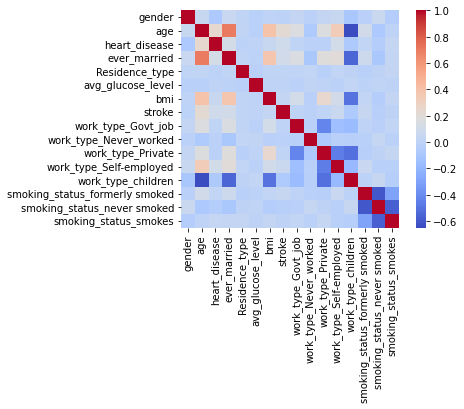

In [21]:
seaborn.heatmap(correlation_matrix, square=True, cmap="coolwarm")

Посмотрим на матрицу корреляции. Полученные корреляции являются предсказуемыми, например, связь между малым возрастом и видом занятости "ребёнок", увеличением количества людей состоящих в браке с повышением возраста. Также можем наблюдать отрицательные значения в парах (вид занятости "ребёнок", когда-либо был женат), (вид занятости "ребёнок", индекс массы тела), (вид занятости "ребёнок", работает неофициально), (курил в прошлом, курит сейчас).

# Нормализация признаков
Нормализацию проведём методом стандартизации

In [22]:
dataset_normalized = (dataset - dataset.mean(axis = 0)) / dataset.std(axis = 0)
dataset_normalized.describe()

,gender,age,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03,4.038000e+03
mean,4.223137e-17,1.055784e-17,-4.399101e-17,1.759640e-17,1.002995e-16,-2.393111e-16,2.604268e-16,1.407712e-17,-7.038561e-18,-7.038561e-18,-2.111568e-17,-7.742417e-17,-1.759640e-17,6.158741e-17,1.055784e-17,3.343316e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.205965e+00,-1.756745e+00,-1.887891e-01,-1.228519e+00,-1.016858e+00,-1.625046e+00,-2.652839e+00,-1.787089e-01,-3.754535e-01,-7.400494e-02,-1.137540e+00,-4.037054e-01,-4.471582e-01,-5.606918e-01,-1.082518e+00,-5.327968e-01
25%,-1.205965e+00,-8.186993e-01,-1.887891e-01,-1.228519e+00,-1.016858e+00,-7.272558e-01,-7.192522e-01,-1.787089e-01,-3.754535e-01,-7.400494e-02,-1.137540e+00,-4.037054e-01,-4.471582e-01,-5.606918e-01,-1.082518e+00,-5.327968e-01
50%,8.290063e-01,3.325465e-02,-1.887891e-01,8.137865e-01,9.831777e-01,-1.487147e-01,-2.316090e-02,-1.787089e-01,-3.754535e-01,-7.400494e-02,8.788721e-01,-4.037054e-01,-4.471582e-01,-5.606918e-01,9.235434e-01,-5.327968e-01
75%,8.290063e-01,7.506896e-01,-1.887891e-01,8.137865e-01,9.831777e-01,5.635781e-01,6.265243e-01,-1.787089e-01,-3.754535e-01,-7.400494e-02,8.788721e-01,-4.037054e-01,-4.471582e-01,-5.606918e-01,9.235434e-01,-5.327968e-01
max,8.290063e-01,1.916521e+00,5.295603e+00,8.137865e-01,9.831777e-01,3.305658e+00,2.730267e+00,5.594305e+00,2.662786e+00,1.350927e+01,8.788721e-01,2.476440e+00,2.235791e+00,1.783069e+00,9.235434e-01,1.876423e+00


# Классификация
Разделим данные на обучающую и тестовую выборку с соотношением 3:1

In [23]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble

In [24]:
x = dataset_normalized.drop(['stroke'], axis=1)
y = dataset['stroke']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.25, random_state = 666)

## K ближайших соседей
2 соседа

In [25]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 2)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.02906208718626156, Test: 0.03564356435643564


4 соседа

In [26]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.03038309114927345, Test: 0.032673267326732675


8 соседей

In [27]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 8)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.03038309114927345, Test: 0.032673267326732675


Можем наблюдать, что на тестовом наборе ошибка одна и та же, в то время когда на тренировочном наборе минимальная ошибка при взятом количестве ближайших соседей равных 2. Сравним с другими методами классификации.

## Random forest

In [28]:
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.0, Test: 0.034653465346534656


Используя random forest получили, что на тренировочном наборе классификация происходит без ошибок, в то время когда на тестовом то же значение ошибки, что и kNN.

## SVM

In [29]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [30]:
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.03038309114927345, Test: 0.032673267326732675


C:\Users\pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.svm import SVC
model = SVC(kernel = 'sigmoid')
model.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [32]:
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.0392998678996037, Test: 0.040594059405940595


C:\Users\pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Используя SVM-linear, на тренировочном наборе ошибка сопоставима с kNN с параметром 4, ошибка на тренировочном такая же, как и в остальных методах. SVM-sigmoid показал наихудший результат по сравнения со всеми методами.

Попробуем подвигать гиперпараметры в Random Forest

In [73]:
model = sklearn.ensemble.RandomForestClassifier(n_estimators = 10, criterion = 'entropy', min_samples_split = 2, min_samples_leaf = 2)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.01453104359313078, Test: 0.032673267326732675


Изменяя параметры в Random Forest, удалось немного повысить точность на тестовом наборе, при этом повысив долю неверное предсказанных результатов на тренировочном. Однако результат неустойчив и меняется, когда запускается ячейка.

# Линейная регрессия

In [49]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = regressor.predict(x_test)

In [51]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficients:', regressor.coef_)

Mean Absolute Error: 0.06550226585907744
Mean Squared Error: 0.029957070858771556
Root Mean Squared Error: 0.17308111063536527
Coefficients: [-1.50750373e-03  5.65878430e-02  9.48127196e-03 -1.23857949e-02
 -4.95768981e-04  2.99444255e-03 -2.89223083e-03 -3.53854791e+11
 -7.91485054e+10 -5.33172474e+11 -3.73278176e+11 -4.00714071e+11
  2.74152739e+11  3.20303534e+11  2.66703966e+11]


In [52]:
from sklearn import linear_model
regressor = linear_model.Ridge(alpha=.5)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficients:', regressor.coef_)

Mean Absolute Error: 0.0655438955173259
Mean Squared Error: 0.029952715522213475
Root Mean Squared Error: 0.173068528399052
Coefficients: [-0.00067699  0.05662799  0.00939864 -0.01233503 -0.00033025  0.00296295
 -0.00284723 -0.00385175  0.00090618 -0.00312587 -0.00708813  0.01398432
  0.00284659 -0.00197725 -0.00055147]


In [53]:
from sklearn import linear_model
regressor = linear_model.BayesianRidge()

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficients:', regressor.coef_)

Mean Absolute Error: 0.06398340327737702
Mean Squared Error: 0.029994096005607474
Root Mean Squared Error: 0.17318803655451342
Coefficients: [-0.00078137  0.05014251  0.00989275 -0.00927273 -0.00028871  0.00270101
 -0.00289901 -0.00320248  0.00069117 -0.0027503  -0.00559213  0.01156015
  0.00299826 -0.00194624 -0.00074462]


Были опробованы так же линейная регрессия, Ридж-регрессия и регрессия Байесовского хребта, все они показали по ошибка примерно одинаковые результаты, однако заметим, что некоторые коэффициенты моделей Ридж регрессии и регрессии Байесовского хребта оказались примерно одинаковыми и в пределах одного порядка, в то время как у линейной регрессии коэффициенты отличаются между собой на порядки.

# Попробуем понизить размерность данных и обучить модели

In [57]:
dataset_normalized.shape

(4038, 16)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
ds_reduced = pca.fit_transform(dataset_normalized.drop(['stroke'], axis=1))

In [59]:
print('Explained variance ratio is ', pca.explained_variance_ratio_)
print('Sum of explained variance ratio is ', sum(pca.explained_variance_ratio_))

Explained variance ratio is  [0.1935283  0.11483665 0.1077044  0.08721806 0.07815767 0.07187777
 0.06855653 0.0663683  0.06391656]
Sum of explained variance ratio is  0.8521642371772691


# Выберем 9 компонент и решим задачу классификации

In [60]:
import pandas as pd

ds_reduced = pd.DataFrame(ds_reduced)
x = ds_reduced
y = dataset['stroke']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.25, random_state = 666)

In [61]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 2)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.028401585204755615, Test: 0.03564356435643564


In [62]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.030052840158520475, Test: 0.032673267326732675


In [63]:
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.0, Test: 0.033663366336633666


In [64]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.03038309114927345, Test: 0.032673267326732675


В целом результаты не изменились, разве что получили ухудшение на Random Forest, хотя и потеряли около 15% информации при понижении размерности. Вероятно уменьшение размерности методом PCA должно ускорить обучение, но уменьшить долю правильно предсказанных меток (в данном случае вероятен ли инсульт или нет), однако на таком небольшом датасете это оказалось незаметным.